In [8]:
# Libraries 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [10]:
# Getting the list of S&P 500 constituents for sp500 calcs
tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()
#Getting historical data, adjusted close
df = yf.download(tickers, period = '10y')

In [98]:

# Remove nulls and reformat
sp500 = df['Adj Close'].dropna(how= 'all', axis= 1)
sp500_3y = df['Adj Close'].dropna(how= 'all', axis= 1)[-756:]
sp500_1y = df['Adj Close'].dropna(how= 'all', axis= 1)[-252:]
sp500_6m = df['Adj Close'].dropna(how= 'all', axis= 1)[-126:]
NVDA = sp500['NVDA']

[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [42]:
#Creating a basket of industry peers + nvidia
industry_stocks =['NVDA', 'INTC', 'AMD', 'QCOM', 'TXN', 'AVGO' ] 
industry_stocks_exc_nvda =['INTC', 'AMD', 'QCOM', 'TXN', 'AVGO' ] 
data = pd.DataFrame(index= industry_stocks)

for industry_stock in industry_stocks:
    info = yf.Ticker(industry_stock).info
    data.loc[industry_stock,
              'Industry'] = info.get('industry')
    data.loc[industry_stock,
              'Sector'] = info.get('sector')
    data.loc[industry_stock,
              'Beta'] = info.get('beta')
    data.loc[industry_stock,
              'ReturnOnAssets'] = info.get('returnOnAssets')
    data.loc[industry_stock,
              'ReturnOnEquity'] = info.get('returnOnEquity')
    data.loc[industry_stock,
              'DebtToEquity'] = info.get('debtToEquity')
    data.loc[industry_stock,
              'CurrentRatio'] = info.get('currentRatio')
""" In this cell block were accessing the YahooFinance database to fetch the figures 
that the requirements ask of us, what is immediately available we store in data"""   
data

,Industry,Sector,Beta,ReturnOnAssets,ReturnOnEquity,DebtToEquity,CurrentRatio
NVDA,Semiconductors,Technology,1.691,0.27228,0.69173,33.149,3.588
INTC,Semiconductors,Technology,0.950,-0.00716,-0.01601,46.253,1.531
AMD,Semiconductors,Technology,1.674,-0.00083,0.00380,5.206,2.188
QCOM,Semiconductors,Technology,1.259,0.10807,0.37071,74.450,2.333
TXN,Semiconductors,Technology,0.992,0.16787,0.45610,67.476,5.693
AVGO,Semiconductors,Technology,1.116,0.14293,0.60312,166.032,2.815


In [111]:
six_month = sp500_6m
one_year = sp500_1y
download_3yn = yf.download(industry_stocks_exc_nvda, period='3y')
three_years_no_nvidia = download_3yn['Adj Close'].dropna(how= 'all', axis= 1)

three_years_NVDA = sp500_3y['NVDA']
one_year_NVDA = three_years_NVDA[-256:]
six_months_NVDA = one_year_NVDA[-126:]


[*********************100%%**********************]  5 of 5 completed


In [ ]:
#nvda
nvda_returns= three_years_NVDA.pct_change()
nvda_three_year_cum = ((1 + nvda_returns).cumprod()-1)*100
#all 
three_year_returns_nonvidia= three_years_no_nvidia.pct_change()
three_year_cum_no_nvidia = ((1 + three_year_returns_nonvidia).cumprod()-1)*100



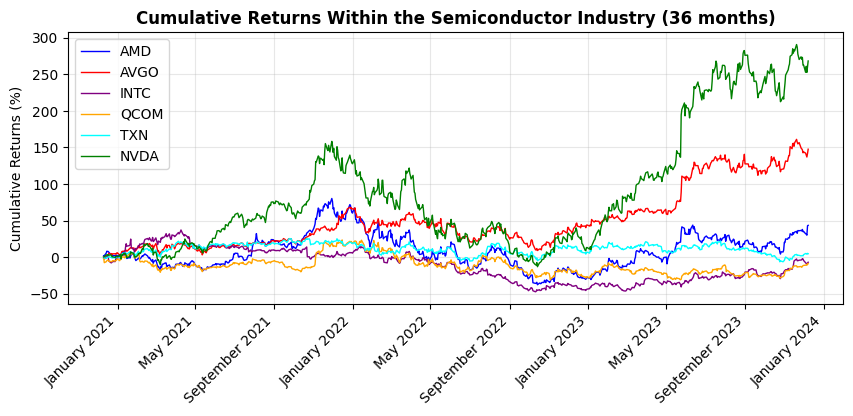

In [84]:
# All plots
ax = three_year_cum_no_nvidia.plot(figsize= (10,4),marker='', linewidth=1, color =['blue', 'red', 'purple', 'orange', 'cyan'])
nvda_three_year_cum.plot(figsize= (10,4),marker='', color= 'green', linewidth=1, legend= True, label= 'NVDA')
# Set the x-axis to display month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.xticks(rotation=45)  # Rotate the ticks for better readability
# Set labels and title
plt.ylabel('Cumulative Returns (%)')
plt.title('Cumulative Returns Within the Semiconductor Industry (36 months)', fontweight='bold')
plt.xlabel(None)
plt.grid(alpha=.3)


In [127]:

three_year_returns= sp500_3y.pct_change()
three_year_cum = ((1 + three_year_returns).cumprod()-1)*100
one_year_returns= sp500_1y.pct_change()
one_year_cum = ((1 + one_year_returns).cumprod()-1)*100
six_month_returns= sp500_6m.pct_change()
six_month_cum = ((1 + six_month_returns).cumprod()-1)*100


# Get the last row (final cumulative returns) and find the 10 largest values
cum_3_10_largest = three_year_cum.iloc[-1].nlargest(10)
cum_1_10_largest = one_year_cum.iloc[-1].nlargest(10)
cum_6m_60_largest = six_month_cum.iloc[-1].nlargest(60)

cum_6m_60_largest # rank 60 
cum_1_10_largest # rank 2 
cum_3_10_largest # rank 2

META    188.519895
NVDA    176.696366
PHM     116.865566
RCL     111.017693
CCL     100.553723
CRM      92.738022
PANW     85.607672
GE       84.713359
ADBE     83.417534
AMD      82.943091
Name: 2023-12-08 00:00:00, dtype: float64